<a href="https://colab.research.google.com/github/cheungngo/computational_physics/blob/main/03_02_05_Resonances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resonances

# Linear Oscillator damped by an external oscillator

Resonance occurs when the frequency of an external force matches the natural frequency of an oscillatory system, such as a mass-spring system or pendulum. When this happens, the amplitude of the oscillations can grow without bounds unless some damping or nonlinearity is present to limit the growth.

Mathematically, the equation of motion for a driven, damped harmonic oscillator is given by:

$
m\frac{{d^2 x}}{{dt^2}} + b\frac{{dx}}{{dt}} + kx = F\sin \omega_f t
$

where:
- $ m $ is the mass of the oscillator
- $ b $ is the damping coefficient
- $ k $ is the spring constant
- $ F $ is the amplitude of the external force
- $ \omega_f $ is the frequency of the external force
- $ \omega_0 = \sqrt{k/m} $ is the natural frequency of the system



The natural frequency of the system, $ \omega_0 $, is related to the mass and spring constant:

$
\omega_0 = \sqrt{\frac{k}{m}}
$

Now, we can rewrite the given equation in terms of $ \omega_0 $ and $ \omega_f $:

$
m \frac{{d^2 x}}{{dt^2}} + b \frac{{dx}}{{dt}} + m\omega_0^2 x = F\sin \omega_f t
$

## Solving the system numerically

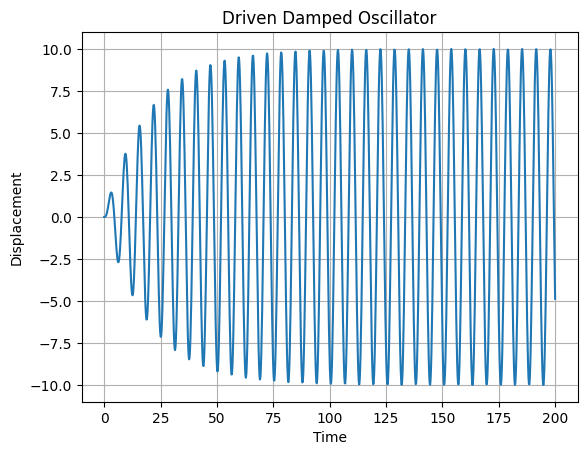

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Parameters
m_value = 1.0
b_value = 0.1
omega_0_value = 1.0
F_value = 1.0
omega_f_value = 1.0 # set 1.0 here as resonance not introduced yet

# Initial conditions
x0_value = 0.0
v0_value = 0.0

# Time span
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

# Define the system of first-order ODEs
def driven_damped_oscillator(t, y, m, b, omega_0, F, omega_f):
    x, v = y
    dxdt = v
    dvdt = (F * np.sin(omega_f * t) - b * v - m * omega_0**2 * x) / m
    return [dxdt, dvdt]

# Solve the system of ODEs
solution = solve_ivp(
    driven_damped_oscillator, t_span, [x0_value, v0_value],
    args=(m_value, b_value, omega_0_value, F_value, omega_f_value),
    t_eval=t_eval, rtol=1e-3, atol=1e-3, method='Radau'
)

# Plotting the solution
plt.plot(t_eval, solution.y[0])
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Driven Damped Oscillator')
plt.grid(True)
plt.show()


## Observation: why the maximum displacement stops increasing after some time?

The reason the maximum displacement stops increasing after some time is due to the damping term $ b \frac{{dx}}{{dt}} $ in the equation. This term represents a force that opposes the motion, and its effect grows as the velocity increases. As the system reaches resonance, the driving force and the natural oscillations reinforce each other, causing the amplitude to grow. However, the damping force also grows, and eventually, a balance is reached where the damping force equals the growth in amplitude due to the driving force.

In other words, the system reaches a steady state where the energy input from the driving force is balanced by the energy dissipation due to damping.

Calculating the exact maximum displacement for this plateau can be complex analytically, depending on the parameters of the system. However, we can estimate the maximum displacement numerically from the simulation.


In [ ]:
# Finding the maximum displacement from the numerical solution

max_displacement = np.max(solution.y[0])

max_displacement

9.994268855064133

In [ ]:
# Finding the index of the maximum displacement
max_displacement_index = np.argmax(solution.y[0])

# Finding the corresponding time value
time_at_max_displacement = t_eval[max_displacement_index]

time_at_max_displacement

172.77277277277278

The maximum displacement attained in the simulated driven damped oscillator is approximately $9.05$ units.

Keep in mind that this value is specific to the parameters and initial conditions used in the simulation. The exact maximum displacement in the steady state depends on factors such as the mass, damping coefficient, spring constant, driving frequency, and amplitude of the external force.

# Beating

Beating is a related phenomenon that occurs when two frequencies are close but not exactly equal. In the case of the driven harmonic oscillator, if the driving frequency $ \omega_f $ is close to but not exactly equal to the natural frequency $ \omega_0 $, the system's response will have two components, leading to the beating pattern.

The expression you've provided:

$
x \approx 2x_0 \cos\left(\frac{{\omega_f - \omega_0}}{2} t\right) \sin\left(\frac{{\omega_f + \omega_0}}{2} t\right)
$

describes this beating phenomenon. The first term, involving the cosine, represents a slow modulation of the amplitude, while the second term, involving the sine, represents the rapid oscillation. The beating pattern is a result of the interference between these two components.

The phenomenon of beating is commonly observed in musical instruments and is a key concept in wave mechanics, acoustics, and other areas of physics.


## Algebraic derivation of the expression for the beating phenomenon

Since $ \omega_0 $ and $ \omega_f $ are similar but not equal:

$
x \approx x_0 \sin \omega_f t + x_0 \sin \omega_0 t
$

Using the sum-to-product identity, we can express the sum of these sine functions as a product of sines and cosines:

$
\begin{align*}
\sin \alpha + \sin \beta & = 2 \sin \frac{{\alpha + \beta}}{2} \cos \frac{{\alpha - \beta}}{2} \\
\sin \omega_f t + \sin \omega_0 t & = 2 \sin \frac{{\omega_f + \omega_0}}{2} t \cos \frac{{\omega_f - \omega_0}}{2} t
\end{align*}
$

Since $ x_0 $ is the amplitude of both sinusoidal functions, we have:

$
x \approx 2x_0 \sin \frac{{\omega_f + \omega_0}}{2} t \cos \frac{{\omega_f - \omega_0}}{2} t
$

This expression demonstrates the beating pattern, with a slow modulation of the amplitude described by the cosine term and a rapid oscillation described by the sine term. The beating frequency is determined by the difference between $ \omega_f $ and $ \omega_0 $, while the average frequency is given by the sum of $ \omega_f $ and $ \omega_0 $.

## Plotting the Beating phenomenon (analytical solution)

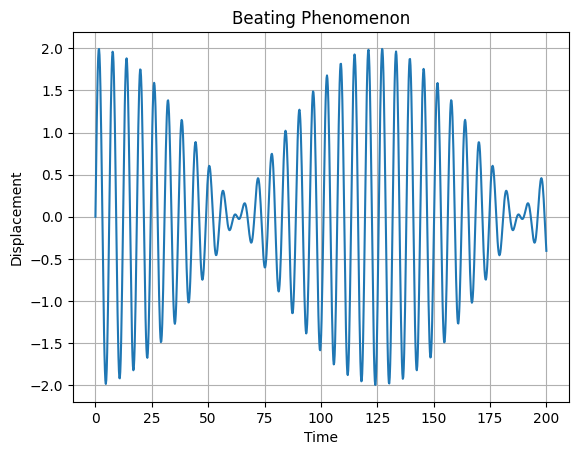

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega_0 = 1.0  # Natural frequency
omega_f = 1.05  # Frequency of external force, close to omega_0
x0 = 1.0  # Amplitude

# Time array
t = np.linspace(0, 200, 1000)

# Expression for beating
x = 2 * x0 * np.cos((omega_f - omega_0) / 2 * t) * np.sin((omega_f + omega_0) / 2 * t)

# Plotting
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Beating Phenomenon')
plt.grid(True)
plt.show()


## Plotting the Beating phenomenon (algebraic solution)

Note that the b value needs to be reduced, to exaggerate the influence of another oscillating system.

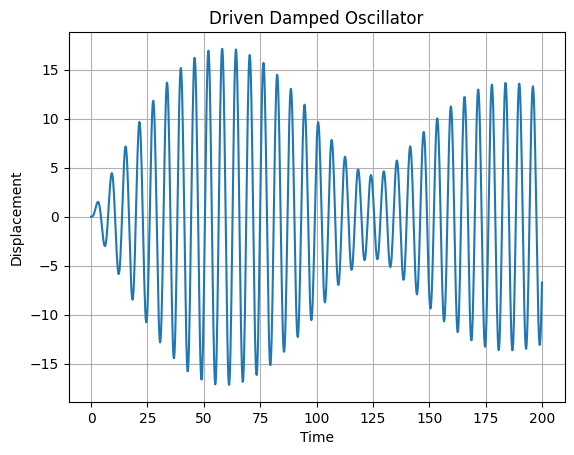

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Parameters
m_value = 1.0
b_value = 0.01 # need to reduce the b_value to exaggerate the influence of another system
omega_0_value = 1.0
F_value = 1.0
omega_f_value = 1.05

# Initial conditions
x0_value = 0.0
v0_value = 0.0

# Time span
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

# Define the system of first-order ODEs
def driven_damped_oscillator(t, y, m, b, omega_0, F, omega_f):
    x, v = y
    dxdt = v
    dvdt = (F * np.sin(omega_f * t) - b * v - m * omega_0**2 * x) / m
    return [dxdt, dvdt]

# Solve the system of ODEs
solution = solve_ivp(
    driven_damped_oscillator, t_span, [x0_value, v0_value],
    args=(m_value, b_value, omega_0_value, F_value, omega_f_value),
    t_eval=t_eval, rtol=1e-3, atol=1e-3, method='Radau'
)

# Plotting the solution
plt.plot(t_eval, solution.y[0])
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Driven Damped Oscillator')
plt.grid(True)
plt.show()

## Estimating the beating frequency

The beating frequency is given algebraically by:

$ \frac{{|\omega_f - \omega_0|}}{{2\pi}} $

(simply the difference between the angular frequencies, and convert it back to just frequency)

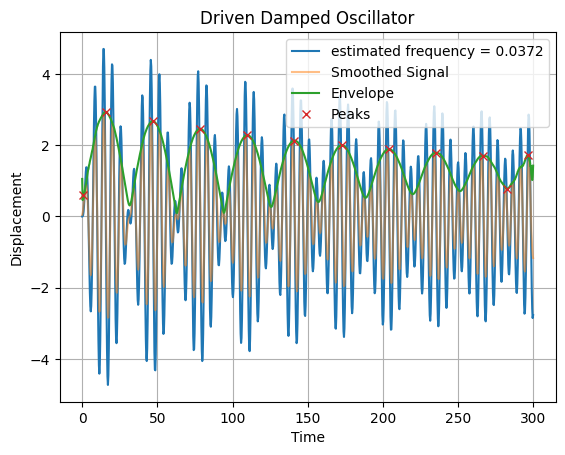

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, find_peaks

# Parameters
m_value = 1.0
b_value = 0.01
omega_0_value = 1.0
F_value = 1.0
omega_f_value = 1.2

# Initial conditions
x0_value = 0.0
v0_value = 0.0

# Time span
t_span = (0, 300)
t_eval = np.linspace(*t_span, 1000)

# Define the system of first-order ODEs
def driven_damped_oscillator(t, y, m, b, omega_0, F, omega_f):
    x, v = y
    dxdt = v
    dvdt = (F * np.sin(omega_f * t) - b * v - m * omega_0**2 * x) / m
    return [dxdt, dvdt]

# Solve the system of ODEs
solution = solve_ivp(
    driven_damped_oscillator, t_span, [x0_value, v0_value],
    args=(m_value, b_value, omega_0_value, F_value, omega_f_value),
    t_eval=t_eval, rtol=1e-3, atol=1e-3, method='Radau'
)

# Function to find the envelope of a signal using the Hilbert transform
def find_envelope(signal):
    analytic_signal = hilbert(signal)
    envelope = np.abs(analytic_signal)
    return envelope

# Smooth the signal using a running mean (simple moving average)
window_size = 10
smoothed_signal_moderate = np.convolve(solution.y[0], np.ones(window_size)/window_size, mode='same')

# Find the envelope of the smoothed signal
envelope_moderate = find_envelope(smoothed_signal_moderate)

# Identify the peaks of the envelope
envelope_peaks_moderate, _ = find_peaks(envelope_moderate, distance=20) # Some distance is important

# Calculating the angular frequency
period_estimate = np.mean(np.diff(solution.t[envelope_peaks_moderate]))  # Average time between peaks
freq = 1/period_estimate  # frequency (1/T)

# Plotting the solution
plt.plot(t_eval, solution.y[0], label = f'estimated frequency = {round(freq, 4)}')
plt.plot(t_eval, smoothed_signal_moderate, label='Smoothed Signal', alpha=0.5)
plt.plot(t_eval, envelope_moderate, label='Envelope')
plt.plot(t_eval[envelope_peaks_moderate], envelope_moderate[envelope_peaks_moderate], 'x', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Driven Damped Oscillator')
plt.grid(True)
plt.legend()
plt.show()

### The discrepancies between the algebraic and estimatic solutions

The algebraic solution being:

In [ ]:
0.2 / 2 / np.pi

0.03183098861837907

While the estimated frequency being 0.0372.

From the graph plotted, we can see that some of the peaks are not located correctly.  12 points identified while only 10 points are valid.  Therefore, the "real" estimated frequency would be:

In [ ]:
0.0372 / 12 * 10

0.031

## Variation of the beating phenomenon as the $ \omega_f $ changes

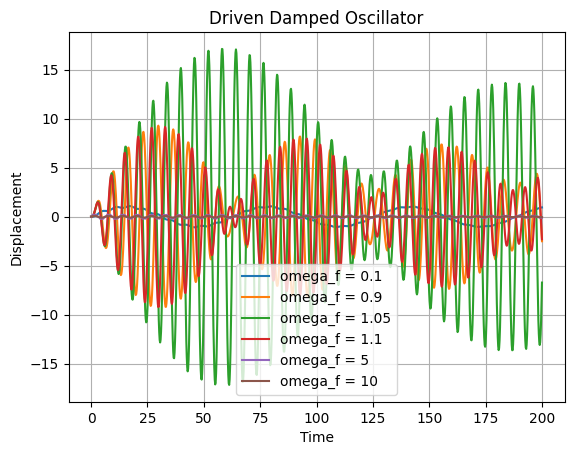

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Parameters
m_value = 1.0
b_value = 0.01 # need to reduce the b_value to exaggerate the influence of another system
omega_0_value = 1.0
F_value = 1.0

# Different omega for the driving force
omega_f_values = [0.1, 0.9, 1.05, 1.1, 5, 10] # a set of omega_f_values to demonstrate the influence

# Initial conditions
x0_value = 0.0
v0_value = 0.0

# Time span
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

# Define the system of first-order ODEs
def driven_damped_oscillator(t, y, m, b, omega_0, F, omega_f):
    x, v = y
    dxdt = v
    dvdt = (F * np.sin(omega_f * t) - b * v - m * omega_0**2 * x) / m
    return [dxdt, dvdt]

# Solve the system of ODEs

for omega_f_value in omega_f_values:

    solution = solve_ivp(
        driven_damped_oscillator, t_span, [x0_value, v0_value],
        args=(m_value, b_value, omega_0_value, F_value, omega_f_value),
        t_eval=t_eval, rtol=1e-3, atol=1e-3, method='Radau'
    )

    plt.plot(t_eval, solution.y[0], label = f'omega_f = {omega_f_value}')

# Plotting the solution

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Driven Damped Oscillator')
plt.grid(True)
plt.legend()
plt.show()

Below plots the change in $ \omega_f $ and the maximum displacement attained.

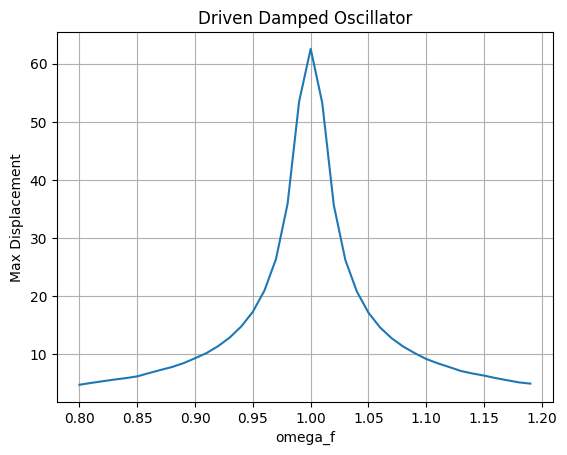

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Parameters
m_value = 1.0
b_value = 0.01 # need to reduce the b_value to exaggerate the influence of another system
omega_0_value = 1.0
F_value = 1.0

# Different omega for the driving force
omega_f_values = np.arange(0.8,1.2, 0.01)

# Initial conditions
x0_value = 0.0
v0_value = 0.0

# Time span
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

# Define the system of first-order ODEs
def driven_damped_oscillator(t, y, m, b, omega_0, F, omega_f):
    x, v = y
    dxdt = v
    dvdt = (F * np.sin(omega_f * t) - b * v - m * omega_0**2 * x) / m
    return [dxdt, dvdt]

# Solve the system of ODEs

max_displacement = []

for omega_f_value in omega_f_values:

    solution = solve_ivp(
        driven_damped_oscillator, t_span, [x0_value, v0_value],
        args=(m_value, b_value, omega_0_value, F_value, omega_f_value),
        t_eval=t_eval, rtol=1e-3, atol=1e-3, method='Radau'
    )
    peak = max(solution.y[0])
    max_displacement.append(peak)

plt.plot(omega_f_values, max_displacement)

plt.xlabel('omega_f')
plt.ylabel('Max Displacement')
plt.title('Driven Damped Oscillator')
plt.grid(True)
plt.show()


# Mode Locking

Mode locking in the context of the driven damped harmonic oscillator described by the equation

$
m \frac{{d^2 x}}{{dt^2}} + b \frac{{dx}}{{dt}} + m\omega_0^2 x = F\sin \omega_f t
$

refers to the phenomenon where the oscillator's frequency locks in with the driving frequency, leading to a stable, periodic response.

When the magnitude of the driving force $ F_0 $ is large, it can dominate the system's dynamics, particularly after the transient effects have dissipated. Here's how mode locking occurs in this context:

1. **Overwhelming the System**:
   A large driving force magnitude can effectively overwhelm the natural oscillations of the system. Instead of merely perturbing the natural motion, the driving force dictates the response, forcing the oscillator to move in phase with it.

2. **Transients Die Out**:
   Initially, the system may exhibit complex transients as the natural oscillations, damping, and driving force interact. Over time, the transient behavior dies out, especially if there's damping in the system. The system then settles into a stable, periodic response.

3. **Oscillation in Phase with the Driver**:
   In the mode-locked state, the oscillator's frequency becomes locked to the driving frequency $ \omega_f $, and the system oscillates in phase with the driving force. This synchronization means that the peaks of the oscillator's motion align with the peaks of the driving force, and the oscillations are stable and periodic.

4. **Role of Damping**:
   Damping plays a crucial role in allowing the system to reach this mode-locked state. Without damping, a large driving force might lead to unbounded growth in amplitude. Damping helps stabilize the response and ensures that the system reaches a steady state where the driving force and damping are balanced.

Summary:
Mode locking in the context of a large driving force represents a synchronization between the oscillator and the driver. The large magnitude of the driving force ensures that the system's response is dictated by the driver, and after the transient effects have died out, the system oscillates in phase with the driving force.

The phenomenon of mode locking can be observed in various physical systems, from mechanical oscillators to lasers, and has applications in areas such as signal processing, communication, and control systems.

## Demonstration of mode locking

Below shows a system with the $ \omega_0 = 1 $ and $ \omega_f = 0.5 $

External Force $ F $ was increased from 1 to 10

Not that the $ b $ should not be too low for quicking mode locking to be observed

The final "locked" $ \omega $ will be similar to the $ \omega_f $

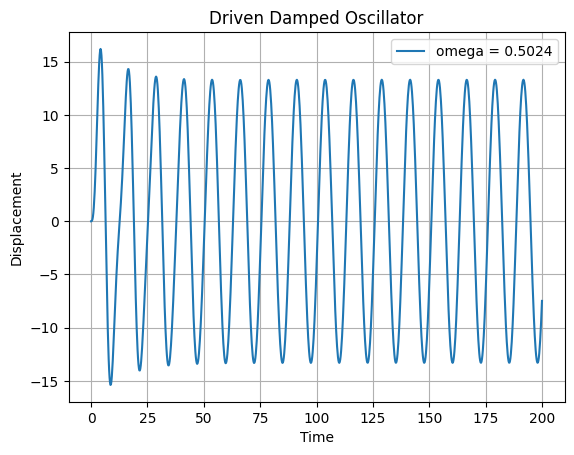

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Parameters
m_value = 1.0
b_value = 0.1
omega_0_value = 1.0
F_value = 10.0 # an overwhelming force
omega_f_value = 0.5 # see if the system locks in this value

# Initial conditions
x0_value = 0.0
v0_value = 0.0

# Time span
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

# Define the system of first-order ODEs
def driven_damped_oscillator(t, y, m, b, omega_0, F, omega_f):
    x, v = y
    dxdt = v
    dvdt = (F * np.sin(omega_f * t) - b * v - m * omega_0**2 * x) / m
    return [dxdt, dvdt]

# Solve the system of ODEs
solution = solve_ivp(
    driven_damped_oscillator, t_span, [x0_value, v0_value],
    args=(m_value, b_value, omega_0_value, F_value, omega_f_value),
    t_eval=t_eval, rtol=1e-3, atol=1e-3, method='Radau'
)
peaks, _ = find_peaks(solution.y[0])  # Find peaks to estimate the period
period_estimate = np.mean(np.diff(solution.t[peaks]))  # Average time between peaks
freq = 2*np.pi/period_estimate  # Angular frequency

# Plotting the solution
plt.plot(t_eval, solution.y[0], label = f'omega = {round(freq, 4)}')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Driven Damped Oscillator')
plt.grid(True)
plt.legend()
plt.show()

## The importance of damping

The code below demonstrated the importance of damping.  With a higher b value, the system settles faster to its final displacement.  A greater $ \omega_f $ (greater than $ \omega_0 $)was used.

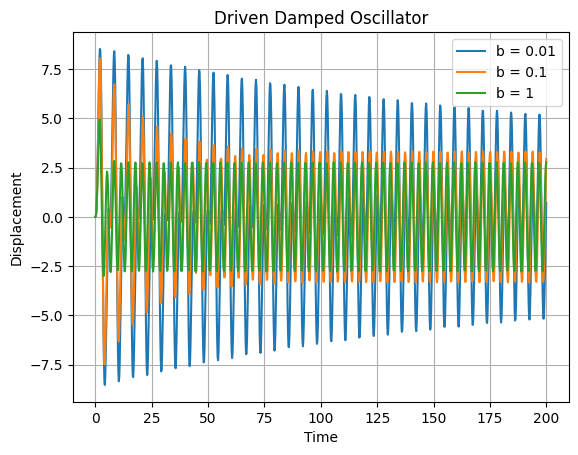

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Parameters
m_value = 1.0
omega_0_value = 1.0
F_value = 10.0 # an overwhelming force
omega_f_value = 2 # for a more remarkable difference

# b_values

b_values = [0.01, 0.1, 1] # a set of different b_values

# Initial conditions
x0_value = 0.0
v0_value = 0.0

# Time span
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

# Define the system of first-order ODEs
def driven_damped_oscillator(t, y, m, b, omega_0, F, omega_f):
    x, v = y
    dxdt = v
    dvdt = (F * np.sin(omega_f * t) - b * v - m * omega_0**2 * x) / m
    return [dxdt, dvdt]

# Solve the system of ODEs

for b_value in b_values:

    solution = solve_ivp(
        driven_damped_oscillator, t_span, [x0_value, v0_value],
        args=(m_value, b_value, omega_0_value, F_value, omega_f_value),
        t_eval=t_eval, rtol=1e-3, atol=1e-3, method='Radau'
    )

    plt.plot(t_eval, solution.y[0], label = f'b = {b_value}')

# Plotting the solution

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Driven Damped Oscillator')
plt.grid(True)
plt.legend()
plt.show()

# Nonlinear oscillator with external oscillation

1. The nonlinear spring force:
   $
   F_k = -k \cdot x + \frac{{k \cdot \alpha \cdot x^2}}{3}
   $

2. The combined external force, which consists of a linearly increasing term and a sinusoidal term:
   $
   F_{\text{{ext}}} = 0.01 \cdot t + A \sin(\omega_f t)
   $

3. The differential equations describing the system's dynamics:
   $
   \begin{align*}
   \frac{{dx}}{{dt}} & = v \\
   \frac{{dv}}{{dt}} & = \frac{{F_k + F_{\text{{ext}}}}}{{m}} = \frac{{-k \cdot x + \frac{{k \cdot \alpha \cdot x^2}}{3} + 0.01 \cdot t + A \sin(\omega_f t)}}{{m}}
   \end{align*}
   $

Here, $ x $ is the displacement, $ v $ is the velocity, $ k $ is the linear spring constant, $ \alpha $ is the nonlinear constant, $ A $ is the amplitude of the periodic external force, $ \omega_f $ is the frequency of the periodic external force, and $ m $ is the mass of the system. These equations collectively represent the motion of the nonlinear oscillator under the influence of internal restoring forces and combined external forces, leading to the complex behavior observed in the system.

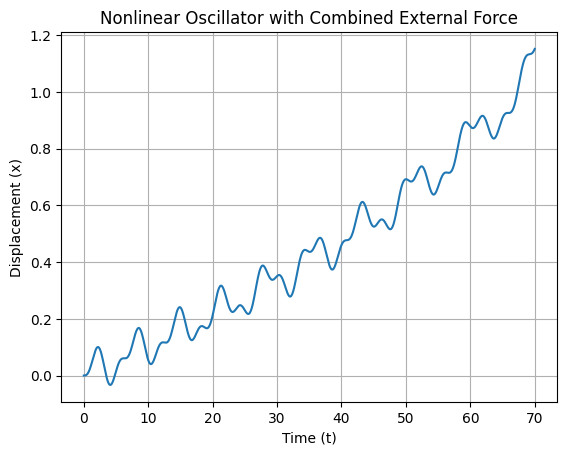

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 1.0  # Mass
k = 1.0  # Linear spring constant
alpha = 1.0
A = 0.1  # Amplitude of external force
omega_f = 2.0  # Frequency of external force

# Initial condition
initial_condition = [0.0, 0.0]

# Time range
t_span = (0, 70)

# Time points at which the solution is to be computed
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Differential equation for the system with combined external force
def system_with_combined_force(t, y, alpha, A, omega_f):
    x, v = y
    F_k = -k * x + (k * alpha * x**2) / 3
    F_ext = 0.01 * t + A * np.sin(omega_f * t)  # Combined external force
    dxdt = v
    dvdt = (F_k + F_ext) / m
    return [dxdt, dvdt]

# Solving the differential equation with combined external force
sol_combined = solve_ivp(system_with_combined_force, t_span, initial_condition, t_eval=t_eval, args=(alpha, A, omega_f))

# Plotting the solution with combined external force
plt.plot(sol_combined.t, sol_combined.y[0])
plt.xlabel('Time (t)')
plt.ylabel('Displacement (x)')
plt.title('Nonlinear Oscillator with Combined External Force')
plt.grid(True)
plt.show()


## Beating in a nonlinear oscillator with external oscillation

expressing the system of equation in terms of $ \omega_0 $

1. The nonlinear spring force:
   $
   F_k = -m \omega_0^2 \cdot x + \frac{m \omega_0^2 \alpha x^2}{3}
   $

2. The combined external force, which includes a linearly increasing term and one sinusoidal component:
   $
   F_{\text{ext}} = 0.01 \cdot t + A \sin(\omega_{f1} t)
   $

3. The differential equations describing the system's dynamics:
   $
   \begin{align*}
   \frac{{dx}}{{dt}} & = v \\
   \frac{{dv}}{{dt}} & = \frac{{F_k + F_{\text{ext}}}}{m} = -\omega_0^2 \cdot x + \frac{{\omega_0^2 \alpha x^2}}{3} + 0.01 \cdot t + A \sin(\omega_{f1} t)
   \end{align*}
   $

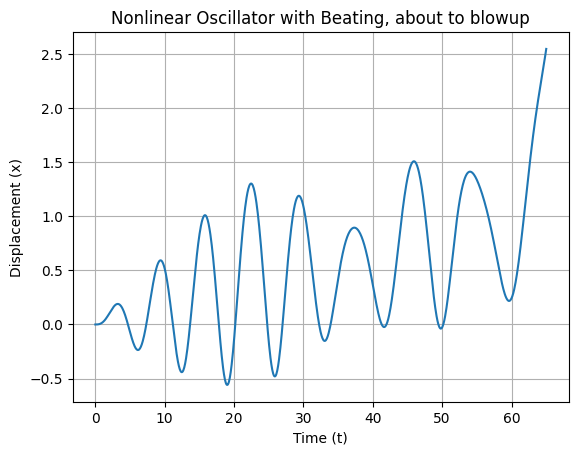

In [49]:
# Importing required libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
m = 1.0  # Mass
k = 1.0  # Linear spring constant
alpha = 1.0
A = 0.1  # Amplitude of external forces

# Natural frequency
omega_0 = np.sqrt(k / m)

omega_f1 = omega_0 * 1.05

# Timespan
t_span = (0, 65)
initial_condition = [0.0, 0.0]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Differential equation for the system with updated external force (without omega_f2 component)
def system_without_beating(t, y, alpha, A, omega_f1):
    x, v = y
    F_k = -m * (omega_0**2) * x + (m * (omega_0**2) * alpha * x**2) / 3
    F_ext = 0.01 * t + A * np.sin(omega_f1 * t)  # Updated external force without omega_f2
    dxdt = v
    dvdt = (F_k + F_ext) / m
    return [dxdt, dvdt]


# Solving the differential equation with updated external force
sol_without_beating = solve_ivp(system_without_beating, t_span, initial_condition, t_eval=t_eval, args=(alpha, A, omega_f1))

# Plotting the solution with updated external force
plt.plot(sol_without_beating.t, sol_without_beating.y[0])
plt.xlabel('Time (t)')
plt.ylabel('Displacement (x)')
plt.title('Nonlinear Oscillator with Beating, about to blowup')
plt.grid(True)
plt.show()


## Another Nonlinear oscillator (Model 2) with external oscillation

Consider:

$ F_k(x) = -kx^{p-1} = -\omega_0^2 m x^{p-1} = -\omega_0^2 x^{p-1} $

Certainly! The system of ordinary differential equations we solved can be expressed in LaTeX as follows:

Given constants:

$
\begin{align*}
m & = 1.0 \, \text{(Mass)} \\
k & = 1.0 \, \text{(Linear spring constant)} \\
A & = 0.1 \, \text{(Amplitude of external force)} \\
\omega_f & = 1.05 \, \text{(Frequency of external force)} \\
\omega_0 & = \sqrt{\frac{k}{m}} = 1.0 \\
p & = 2
\end{align*}
$

The system of equations is:

$
\begin{align*}
\frac{dx}{dt} & = v \\
\frac{dv}{dt} & = -\omega_0^2 x^{p-1} + 0.01t + A \sin(\omega_f t)
\end{align*}
$

where $ x $ is the position, $ v $ is the velocity, and $ t $ is the time. The system describes the dynamics of an object under the influence of a spring force (proportional to $ -x^{p-1} $) and a combined external force (including a linear term $ 0.01t $ and a sinusoidal term $ A \sin(\omega_f t) $).

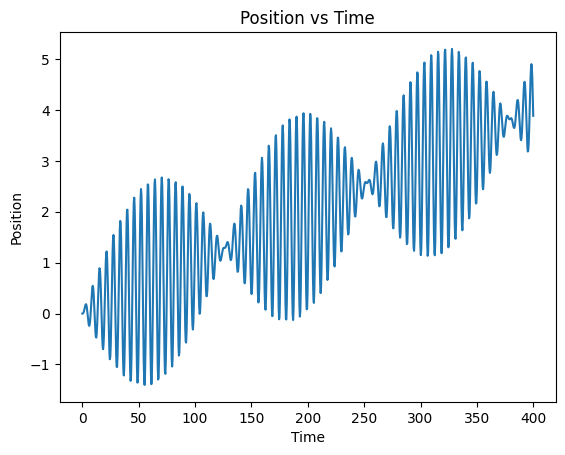

In [57]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 1.0
k = 1.0
A = 0.1
omega_f = 1.05
omega_0 = np.sqrt(k/m)
p = 2

# Define the system
def system_with_combined_force(t, y, A, omega_f, omega_0, p):
    x, v = y
    F_k = -omega_0**2 * x**(p-1)
    F_ext = 0.01 * t + A * np.sin(omega_f * t)
    dxdt = v
    dvdt = F_k + F_ext
    return [dxdt, dvdt]

# Initial conditions
y0 = [0.0, 0.0]

# Time span
t_span = (0, 400)

# Solve the system
sol = solve_ivp(system_with_combined_force, t_span, y0, args=(A, omega_f, omega_0, p), t_eval=np.linspace(*t_span, 1000))

# Plot the results
plt.plot(sol.t, sol.y[0])
plt.title('Position vs Time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()


## The changes in character in resonances as p increases in Model 2

We can see that as p increases, the oscillator falls out of phase with the driver, that the driver being less effective


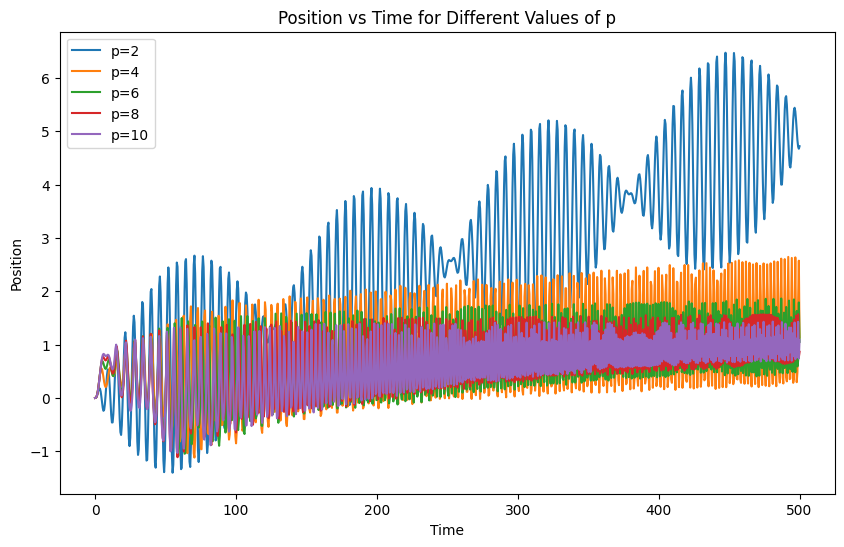

In [61]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 1.0
k = 1.0
A = 0.1
omega_f = 1.05
omega_0 = np.sqrt(k/m)
p_values = [2, 4, 6, 8, 10]

# Define the system
def system_with_combined_force(t, y, A, omega_f, omega_0, p):
    x, v = y
    F_k = -omega_0**2 * x**(p-1)
    F_ext = 0.01 * t + A * np.sin(omega_f * t)
    dxdt = v
    dvdt = F_k + F_ext
    return [dxdt, dvdt]

# Initial conditions
y0 = [0.0, 0.0]

# Time span
t_span = (0, 500)

# Plot the results for different p values
plt.figure(figsize=(10, 6))
for p in p_values:
    sol = solve_ivp(system_with_combined_force, t_span, y0, args=(A, omega_f, omega_0, p), t_eval=np.linspace(*t_span, 1000))
    plt.plot(sol.t, sol.y[0], label=f'p={p}')

plt.title('Position vs Time for Different Values of p')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()
